# 序列資料預測 - MLP, RNN, LSTM 比較 (DIY資料集)


## 1.DIY Dataset 序列資料
建立序列 Dataset，以等差數列，長度取 12
例如：x=[15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125] y=135

### 1.1 DIY 製作『數字序列』資料之準備工作

In [1]:
# 定義DIY函式
from numpy import array

# 傳入序列內容 raw, 指定每組序列長度 seq
def DIY(raw, seq):
	x, y = list(), list()
	for i in range(len(raw)):
		end = i + seq  # 設定序列結束點入
		if end > len(raw)-1:  # 檢查是否結束序列
			break
		# 產生序列(x數據/題目 ,y標籤/答案)
		seq_x, seq_y = raw[i:end], raw[end]
		x.append(seq_x)  # 元素加入list
		y.append(seq_y)  # 元素加入list
	return array(x), array(y)  # list轉矩陣 並傳回

# 自訂顯示函數
def show(x, y):
  for i in range(len(x)):
    print(x[i], y[i])  # 同時列出 x, y

### 1.2 原始數據

In [2]:
# 設定序列內容
raw_data = []
for i in range(15,550,10):
    raw_data.append(i)

# 序列長度 seq
seq = 12

### 1.3 建立訓練集 X_train, Y_train

In [3]:
# 使用函式 DIY() 及 show()
x_train, y_train = DIY(raw_data, seq)
show(x_train, y_train)

[ 15  25  35  45  55  65  75  85  95 105 115 125] 135
[ 25  35  45  55  65  75  85  95 105 115 125 135] 145
[ 35  45  55  65  75  85  95 105 115 125 135 145] 155
[ 45  55  65  75  85  95 105 115 125 135 145 155] 165
[ 55  65  75  85  95 105 115 125 135 145 155 165] 175
[ 65  75  85  95 105 115 125 135 145 155 165 175] 185
[ 75  85  95 105 115 125 135 145 155 165 175 185] 195
[ 85  95 105 115 125 135 145 155 165 175 185 195] 205
[ 95 105 115 125 135 145 155 165 175 185 195 205] 215
[105 115 125 135 145 155 165 175 185 195 205 215] 225
[115 125 135 145 155 165 175 185 195 205 215 225] 235
[125 135 145 155 165 175 185 195 205 215 225 235] 245
[135 145 155 165 175 185 195 205 215 225 235 245] 255
[145 155 165 175 185 195 205 215 225 235 245 255] 265
[155 165 175 185 195 205 215 225 235 245 255 265] 275
[165 175 185 195 205 215 225 235 245 255 265 275] 285
[175 185 195 205 215 225 235 245 255 265 275 285] 295
[185 195 205 215 225 235 245 255 265 275 285 295] 305
[195 205 215 225 235 245 255

### 1.4 建立測試集 x_test, y_test

In [5]:
# 使用未知數字建立測試集
test_data = []
for i in range(710,950,10): # x_train 15,550
    test_data.append(i)

# 序列長度 seq
seq = 12
x_test, y_test = DIY(test_data, seq)
show(x_test, y_test)

[710 720 730 740 750 760 770 780 790 800 810 820] 830
[720 730 740 750 760 770 780 790 800 810 820 830] 840
[730 740 750 760 770 780 790 800 810 820 830 840] 850
[740 750 760 770 780 790 800 810 820 830 840 850] 860
[750 760 770 780 790 800 810 820 830 840 850 860] 870
[760 770 780 790 800 810 820 830 840 850 860 870] 880
[770 780 790 800 810 820 830 840 850 860 870 880] 890
[780 790 800 810 820 830 840 850 860 870 880 890] 900
[790 800 810 820 830 840 850 860 870 880 890 900] 910
[800 810 820 830 840 850 860 870 880 890 900 910] 920
[810 820 830 840 850 860 870 880 890 900 910 920] 930
[820 830 840 850 860 870 880 890 900 910 920 930] 940


### 1.5 查詢 DIY Dataset 資料筆數

In [6]:
# 查看資料結構
print(x_train.shape , x_test.shape)
print(y_train.shape , y_test.shape)

(42, 12) (12, 12)
(42,) (12,)


In [7]:
# RNN模型需要`三維矩陣`輸入數據
# np-2D轉3D 改變矩陣形狀 reshape
import numpy as np  #  2D, (3D-1, 3D-2, 3D-3)

x_train_3d = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test_3d = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(x_train_3d.shape)
print(x_test_3d.shape)
# print(x_train_3d)
# print(x_test_3d)

(42, 1, 12)
(12, 1, 12)


## 2.建模與訓練參數調整

### 2.1 匯入TensorFlow

In [8]:
# 匯入TensorFlow
import tensorflow

# 匯入建模所需的模組
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model     #模型工具
from tensorflow.keras.models import Sequential  #順序序模型
from tensorflow.keras.layers import Dense    #全連接層
from tensorflow.keras import backend       #後端模組

# 建立 RNN, LSTM 模型
from tensorflow.keras.layers import SimpleRNN  # RNN循環神經網絡
from tensorflow.keras.layers import LSTM   # LSTM模組

### 2.2 建模與編譯

In [9]:
# MLP 模型
model_MLP = Sequential()
model_MLP.add(Dense(10, activation='relu', input_dim=seq, name='Hidden-1'))  #隱藏層
model_MLP.add(Dense(100, activation='relu', name='Hidden-2'))
model_MLP.add(Dense(1, name='Out')) #輸出層
model_MLP.summary()

# 編譯模型
model_MLP.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 10)                130       
                                                                 
 Hidden-2 (Dense)            (None, 100)               1100      
                                                                 
 Out (Dense)                 (None, 1)                 101       
                                                                 
Total params: 1331 (5.20 KB)
Trainable params: 1331 (5.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# 使用SimpleRNN建立RNN模型
model_RNN = Sequential(name='RNN')
model_RNN.add(SimpleRNN(units=6, input_dim=seq, activation='relu', name='RNN'))
model_RNN.add(Dense(1)) #輸出層
model_RNN.summary()

# 編譯模型
model_RNN.compile(loss='mean_squared_error', optimizer='rmsprop')


Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 RNN (SimpleRNN)             (None, 6)                 114       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# 使用 LSTM 模型
model_LSTM = Sequential(name='LSTM')
model_LSTM.add(LSTM(units=6, input_dim=seq, activation='relu', name='LSTM'))
model_LSTM.add(Dense(1)) #輸出層
model_LSTM.summary()

# 編譯模型
model_LSTM.compile(loss='mean_squared_error', optimizer='rmsprop')


Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM (LSTM)                 (None, 6)                 456       
                                                                 
 dense (Dense)               (None, 1)                 7         
                                                                 
Total params: 463 (1.81 KB)
Trainable params: 463 (1.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
print('各模型參數個數：')
print("MLP: ", model_MLP.count_params())
print("RNN: ", model_RNN.count_params())
print("LSTM: ", model_LSTM.count_params())

各模型參數個數：
MLP:  1331
RNN:  121
LSTM:  463


### 2.3 調整模型 "訓練" 參數
- 傳回 model.fit() 的歷史記錄

In [14]:
# 開始訓練
%%time
epoch = 2000
history_MLP = model_MLP.fit(x_train, y_train, epochs=epoch, verbose=0)

CPU times: user 16 s, sys: 496 ms, total: 16.5 s
Wall time: 21.7 s


In [15]:
# 開始訓練
%%time
epoch = 2000
history_RNN = model_RNN.fit(x_train_3d, y_train, epochs=epoch, verbose=0)

CPU times: user 14.2 s, sys: 506 ms, total: 14.7 s
Wall time: 12.3 s


In [ ]:
# 開始訓練
%%time
epoch = 2000
history_LSTM = model_LSTM.fit(x_train_3d, y_train, epochs=epoch, verbose=0)

CPU times: user 14.8 s, sys: 546 ms, total: 15.3 s
Wall time: 12.6 s


### 2.4 顯示訓練成效loss

In [ ]:
# 評估模型性能

train_result_MLP, acc = model_MLP.evaluate(x_train, y_train)
test_result_MLP, acc = model_MLP.evaluate(x_test, y_test)
print('MLP Train loss: {:.6f}'.format(train_result_MLP))
print('MLP Test loss: {:.6f}'.format(test_result_MLP))

train_result_RNN = model_RNN.evaluate(x_train_3d, y_train)
test_result_RNN = model_RNN.evaluate(x_test_3d, y_test)
print('RNN Train loss: {:.6f}'.format(train_result_RNN))
print('RNN Test loss: {:.6f}'.format(test_result_RNN))

train_result_LSTM = model_LSTM.evaluate(x_train_3d, y_train)
test_result_LSTM = model_LSTM.evaluate(x_test_3d, y_test)
print('LSTM Train loss: {:.6f}'.format(train_result_LSTM))
print('LSTM Test loss: {:.6f}'.format(test_result_LSTM))


1/1 [==============================] - 0s 31ms/step - loss: 0.0671 - accuracy: 0.0000e+00
MLP Train loss: 0.011716
MLP Test loss: 0.067124
1/1 [==============================] - 0s 28ms/step - loss: 55.6735
RNN Train loss: 12.344075
RNN Test loss: 55.673512
1/1 [==============================] - 0s 26ms/step - loss: 763367.6875
LSTM Train loss: 122293.335938
LSTM Test loss: 763367.687500


### 2.5 查看訓練的過程

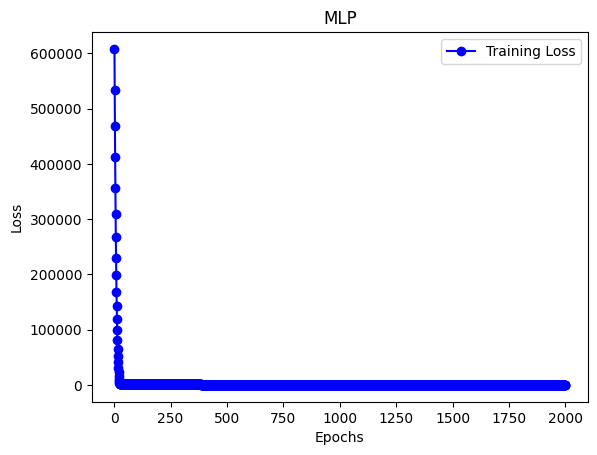

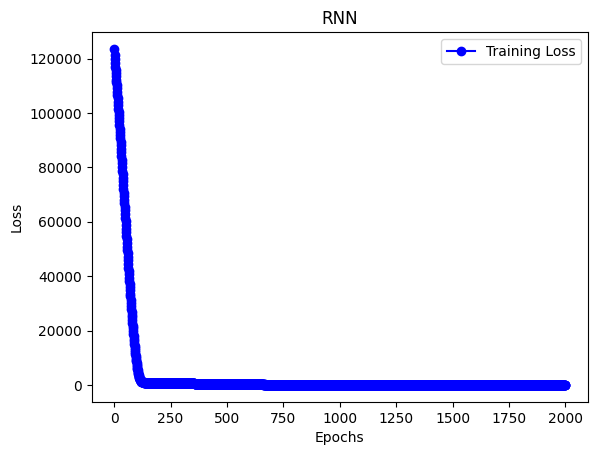

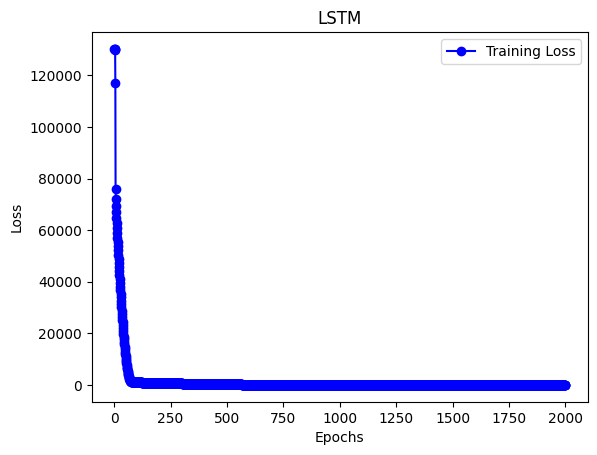

In [ ]:
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt

# 顯示訓練和驗證損失
def draw_history(list, title):
  loss = list.history['loss']
  epochs = range(1, len(loss)+1)
  plt.plot(epochs, loss, 'bo-', label='Training Loss')
  plt.title(title)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

draw_history(history_MLP, 'MLP')
draw_history(history_RNN, 'RNN')
draw_history(history_LSTM, 'LSTM')

### 2.6 重新建模前先刪除舊模組
- 重覆執行 model.fit() 是繼續之前，再增加訓練
- 繼續訓練：重覆執行訓練 model.fit()，查看每次的結果
- 比較重新建模後再執行的結果

In [ ]:
# 調整的參數與訓練成效，會累積影響現有模型
# 清除與刪除現有模型，調整參數才有意義

# backend.clear_session()

# del model_MLP
# del model_RNN
# del model_LSTM

## 3.模型預測

In [ ]:
# 使用測試集預測
y_MLP = model_MLP.predict(x_test, verbose=0)
y_RNN = model_RNN.predict(x_test_3d, verbose=0)
y_LSTM = model_LSTM.predict(x_test_3d, verbose=0)

for i in range(len(y_MLP)):
  print(y_test[i], y_MLP[i], y_RNN[i], y_LSTM[i])  # 同時列出各個預測值

830 [831.54016] [827.1538] [831.61505]
840 [841.59485] [837.1175] [841.6361]
850 [851.6498] [847.0812] [851.6572]
860 [861.7044] [857.045] [861.6783]
870 [871.75916] [867.0087] [871.69934]
880 [881.814] [876.97253] [881.7204]
890 [891.8687] [886.9362] [891.7415]
900 [901.92334] [896.89996] [901.76263]
910 [911.9783] [906.8638] [911.7837]
920 [922.03284] [916.82745] [921.8048]
930 [932.0879] [926.79126] [931.82587]
940 [942.14246] [936.755] [941.84705]


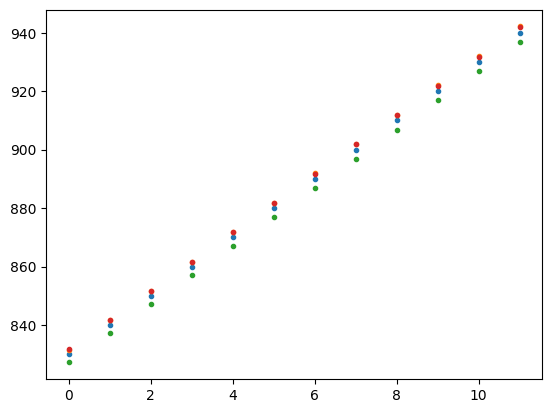

In [ ]:
xt = range(0,seq)
plt.plot(xt, y_test, '.')
plt.plot(xt, y_MLP, '.')
plt.plot(xt, y_RNN, '.')
plt.plot(xt, y_LSTM, '.')

plt.show()